In [1]:
import os
SPARK_HOME="/opt/spark"
os.environ["PYSPARK_PYTHON"] = "python3"
# os.environ["PYSPARK_PYTHON"]="python"
os.environ["PYSPARK_DRIVER_PYTHON"]="jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"]="notebook"
os.environ["SPARK_HOME"] = SPARK_HOME
os.environ["SPARK_CLASSPATH"] = "/opt/spark/jars/sqljdbc4.jar"

 

from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Task_3") \
        .getOrCreate()

In [2]:
#from pyspark.sql import SQLContext
# sqlContext = SQLContext(spark)
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql.types import *

In [13]:
df_path = "/home/rupeshr/Desktop/TSA_Python/dataset/multivariate_dataset.csv"
df = spark.read.format("com.databricks.spark.csv").option("header", "true").option("inferSchema", "true").load(df_path)
df.show()

+----------+------+--------+-----+-----+------+---+
|      Date| Money|Spending| Gain| Loss|profit|sea|
+----------+------+--------+-----+-----+------+---+
|1995-01-01|3492.4|  4851.2| 2891| 1000|    23|  5|
|1995-02-01|3489.9|  4850.8| 2893| 1101|    24|  5|
|1995-03-01|3491.1|  4885.4| 2895| 1202|    25|  5|
|1995-04-01|3499.2|  4890.2| 2897| 1303|    26|  5|
|1995-05-01|3524.2|  4933.1|-2314| 1404|    27|  5|
|1995-06-01|3548.9|  4977.5|-2415| 1505|    28|  5|
|1995-07-01|3567.4|  4970.2|-2516| 1606|    29|  5|
|1995-08-01|3589.0|  5005.3|-2617| 1707|    30|  5|
|1995-09-01|3602.1|  5020.5|-2718| 1808|    31|  5|
|1995-10-01|3613.4|  5013.9|-2819| 1909|    32|  5|
|1995-11-01|3619.9|  5055.6|-2920| 2010|    33|  5|
|1995-12-01|3629.5|  5097.5|-3021| 2111|    34|  5|
|1996-01-01|3647.9|  5085.7|-3122| 2212|    35|  5|
|1996-02-01|3661.9|  5132.8| 2917| 2313|    36|  5|
|1996-03-01|3687.0|  5173.3| 2919| 2414|    37|  5|
|1996-04-01|3697.8|  5208.0| 2921|-2515|    38|  5|
|1996-05-01|

In [4]:
df.dtypes

[('Date', 'string'),
 ('Money', 'double'),
 ('Spending', 'double'),
 ('Gain', 'int'),
 ('Loss', 'int')]

In [5]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox 
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.types import *
from pyspark.sql import Window
from rest_framework.response import Response
# Auxiliary functions
# Pandas Types -> Spark Types
#from edge.stats.sparksession import spark_session

def equivalent_type(f):
    if f == 'datetime64[ns]': return DateType()
    elif f == 'int64': return LongType()
    elif f == 'int32': return IntegerType()
    elif f == 'float64': return DoubleType()
    else: return StringType()
def define_structure(string, format_type):
    try: typo = equivalent_type(format_type)
    except: typo = StringType()
    return StructField(string, typo)
# Converts pandas dataframe to spark dataframe
def pandas_to_spark(df_pandas):
    sqlContext = spark
    columns = list(df_pandas.columns)
    types = list(df_pandas.dtypes)
    struct_list = []
    for column, typo in zip(columns, types):
        struct_list.append(define_structure(column, typo))
    p_schema = StructType(struct_list)
    return sqlContext.createDataFrame(df_pandas, p_schema)


def box_and_cox(*,df,column):
    for i in df.columns:
        if i in column:
            s = df.select(i).dtypes[0]
            print(s)
            try:
                if s[1] == "int" or s[1] == "float" or s[1] == "double" or s[1] == "bigint" or s[1] == "long":
                    temp_df=df.toPandas()
                    temp,fitted_lambda=boxcox(temp_df[column])
                    print('fitted_lambda:',fitted_lambda)
                    temp_df[column]=temp
                    plt.hist(temp_df[column])
                    data=pandas_to_spark(temp_df)
            except:
                return Response({"status": "failure", "error": "please select numerical type column"})
    return data

In [14]:
s=box_and_cox(df=df,column='sea')

('sea', 'int')


ImproperlyConfigured: Requested setting DEFAULT_CHARSET, but settings are not configured. You must either define the environment variable DJANGO_SETTINGS_MODULE or call settings.configure() before accessing settings.

In [13]:
s.show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|    24.128629531470413|
|         2|  Male| 21|                15|     45.32872199125077|
|         3|Female| 20|                16|     4.135102431582098|
|         4|Female| 23|                16|     43.40885285551645|
|         5|Female| 31|                17|     24.66786348457584|
|         6|Female| 22|                17|     42.92629505650516|
|         7|Female| 35|                18|     4.135102431582098|
|         8|Female| 23|                18|     51.46307114128338|
|         9|  Male| 64|                19|    1.7961477877085403|
|        10|Female| 30|                19|    40.985215822565365|
|        11|  Male| 67|                19|     9.598893604612172|
|        12|Female| 35|                19|     53.78357882041825|
|        1

In [101]:
temp_df=df.select('High').toPandas()
temp_df['High']=temp_df['High'].astype('float')
temp_df.head()

,High
0,0.256706
1,0.256706
2,0.256706
3,0.256706
4,1.090000


In [100]:
from scipy import stats
temp,fitted_lambda=stats.boxcox(temp_df['High'])
print(fitted_lambda)

0.043399944233461066


In [95]:
temp_df['High']=temp
temp_df.head()
#print(fitted_lambda)

,High
0,-1.320476
1,-1.320476
2,-1.320476
3,-1.320476
4,0.086339


In [9]:
import numpy as np
from scipy import stats
  
import seaborn as sns
import matplotlib.pyplot as plt
  
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 10000000)
s=pd.DataFrame(original_data)
s.head()
#s.count()

In [147]:
fitted_data, fitted_lambda = stats.boxcox(original_data)
s=pd.DataFrame(fitted_data)
s.head()

,0
0,-0.622692
1,-0.256556
2,-1.829033
3,-1.169706
4,-1.242492


TypeError: len() of unsized object

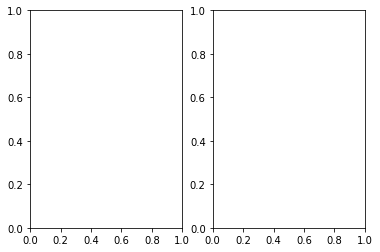

In [11]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df.select('High'), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(s.select('High'), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [13]:
def transformations(dsname, column, column_name):
    #if operations == 'abs':
    abst = dsname.withColumn(column_name, abs(col(column)))

    #elif operations == 'sqrt':
    squrt = dsname.withColumn(column_name, sqrt(col(column)))

    #elif operations == 'cbrt':
    cubrt = dsname.withColumn(column_name, cbrt(col(column)))

    #elif operations == 'reciprocal':
    #if dsname.filter(col(column) == 0).count() > 0:
    #    dsname = "no reciprocal"
    #    return dsname
    #dsname.registerTempTable("tempTable")
    #reci = sqlContext.sql("select *, (1/" + i + ") as " + column_name + " from tempTable")

    #elif operations == 'powerof2':
    pwtw = dsname.withColumn(column_name, col(column) * col(column))

    #elif operations == 'powerof3':
    pwth = dsname.withColumn(column_name, col(column) * col(column) * col(column))
    
    return abst,squrt,cubrt,pwtw,pwth

In [14]:
abst,squrt,cubrt,pw2,pw3=transformations(df,'High','High1')

In [15]:
pw3.show()

+--------+------------+--------+--------+--------+--------+----------+-------------+--------------------+
|Currency|        Date|    Open|    High|     Low|   Close|    Volume|   Market Cap|               High1|
+--------+------------+--------+--------+--------+--------+----------+-------------+--------------------+
|Currency|        Date|    null|0.256706|    null|    null|    Volume|   Market Cap|0.016916404398743815|
|Currency|        Date|    null|0.256706|    null|    null|    Volume|   Market Cap|0.016916404398743815|
|Currency|        Date|    null|0.256706|    null|    null|    Volume|   Market Cap|0.016916404398743815|
|Currency|        Date|    null|0.256706|    null|    null|    Volume|   Market Cap|0.016916404398743815|
|      0x|Feb 11, 2018|    1.09|    1.09|0.934155|0.979054| 4,888,770|  555,363,000|  1.2950290000000002|
|      0x|Feb 10, 2018|    1.14|     1.2|0.985705|     1.1|10,828,700|  576,535,000|               1.728|
|      0x|Feb 09, 2018|    1.08|    1.15|    1

In [ ]:
import sys
import traceback
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Task_3") \
        .getOrCreate()
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.mllib.clustering import BisectingKMeans
#from pyspark.mllib.clustering import GaussianMixture, GaussianMixtureModel


def error(clusters,point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

class optimalcluster(APIView):
    def post(self, request):
        try:
            connections.close_all()
            t1 = datetime.now()
            data = request.data
            module = data.get('module', 'da')
            filename = data['filename']
            username = data['username']
            algorithm=data['algorithm']
            stat = Statistics.objects.get(file_name=filename)
            colmap = ast.literal_eval(stat.descriptive_stats)
            for i in colmap:
                if i['ignored'] == 'no':
                    if i['missing_values'] != 0:
                        return Response({"status": "missingvalues"})
            spark_df = read_file(username, filename, module)
            column = spark_df.columns
            column = get_unignored(filename, column)  # actual columns in terms of c0,c1 after unignore
            spark_df = spark_df.select(column)  # here the dataset will contain the columns which are unignored
            catcols, numcols = find_numerical_categorical_columns(spark_df)
            for catcol in catcols:
                categories = []
                x = spark_df.select(catcol).distinct().collect()
                for y in x:
                    categories.append(y[0])
                categories.sort()
                for k, category in enumerate(categories):
                    function = udf(lambda item: 1 if item == category else 0, IntegerType())
                    new_column_name = catcol + '_' + str(k)
                    spark_df = spark_df.withColumn(new_column_name, function(col(catcol)))
                spark_df = spark_df.drop(catcol)
            spark_df.show()
            df1=spark_df.rdd.map(list)
            for x in df1.collect():
                print(x)
            #clusalgolist = ["gm", "km","bkm"]
            outputlist = []
            if algorithm == "KMeans" or algorithm == "GaussianMixture":
                for i in np.arange(2, 20):
                    clusters = KMeans.train(df1, k=i)
                    WCSS = df1.map(lambda point: error(clusters, point)).reduce(lambda x, y: x + y)
                    print(i, WCSS)
                    outputlist.append({"X": i, "Y": WCSS})
            elif algorithm == "BisectingKMeans":
                for i in np.arange(2, 20):
                    model = BisectingKMeans.train(df1, k=i)
                    cost = model.computeCost(df1)
                    print(i, cost)
                    outputlist.append({"X": i, "Y": cost})
            print(outputlist)
            return Response({"status": "success", "algorithm": algorithm, "output": outputlist})
        except Exception as e:
            traceback.print_exc()
            return Response({"status": "failure", "error": str(e)})
